In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from bokeh.resources import INLINE
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
import pandas_bokeh
pd.set_option('plotting.backend', 'pandas_bokeh')

output_notebook(INLINE)

Loading BokehJS ...

In [25]:
data = pd.read_csv("ski.csv")
weight = pd.read_csv("morgenvekt.csv")
elsa_weight = pd.read_csv("../elsa/vekt.csv")
topptur = pd.read_csv("topptur.csv")

In [26]:
data.head()

,Date,Activity,Distance(m),Time,Location,Elsa
0,2020-02-24,ski-skate,4780,0,Bymarka,1
1,2020-02-29,ski-classic,7690,0,Bymarka,1
2,2020-03-01,ski-classic,12650,0,Bymarka,1
3,2020-03-02,ski-classic,7690,0,Bymarka,1
4,2020-03-03,ski-classic,7690,0,Bymarka,1


In [27]:
weight.head()

,Date,Weight
0,2020-03-03,71.2
1,2020-03-07,71.9
2,2020-03-09,70.7
3,2020-03-10,71.4
4,2020-03-11,72.0


In [28]:
topptur.head()

,Date,Height(m),Distance(m),Time,Location,Elsa
0,2020-02-24,110,0,0.0,Grakallen,1
1,2020-02-24,110,0,0.0,Grakallen,1
2,2020-03-14,300,0,0.0,Klarafjell,1
3,2020-03-29,110,0,0.0,Grakallen,1
4,2020-03-29,110,0,14.0,Grakallen,1


In [29]:
data['Date'] = pd.to_datetime(data['Date'])

In [30]:
distance = data["Distance(m)"]

print("####  Langrenn  ####")
print("Antall turer: ", distance.shape[0])
print("Total Distance: ", np.sum(distance), "meter")
print("Gjennomsnittlig distanse: ", np.round(np.average(distance)), "meter")

height = topptur["Height(m)"]
print("\n####  Topptur  ####")
print("Antall turer: ", height.shape[0])
print("Totalt høydemeter: ", np.sum(height), "meter")
print("Gjennomsnittlig høydemeter: ", np.round(np.average(height)), "meter")


####  Langrenn  ####
Antall turer:  17
Total Distance:  150468 meter
Gjennomsnittlig distanse:  8851.0 meter

####  Topptur  ####
Antall turer:  8
Totalt høydemeter:  1070 meter
Gjennomsnittlig høydemeter:  134.0 meter


In [31]:
colormap = {'ski-skate': 'red', 'ski-classic': 'blue'}
colors = [colormap[x] for x in data['Activity']]

p = figure(plot_width=500, plot_height=400, x_axis_type="datetime")
TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
]
hover = HoverTool(
    tooltips = [
        ("Date", "@Date{%Y-%m-%d}"),
    ],
    formatters={
        'Date': 'datetime',
    },
)
p.add_tools(hover)
p.circle('Date', 'Distance(m)', size=10, fill_alpha=0.2, source=data)
show(p)

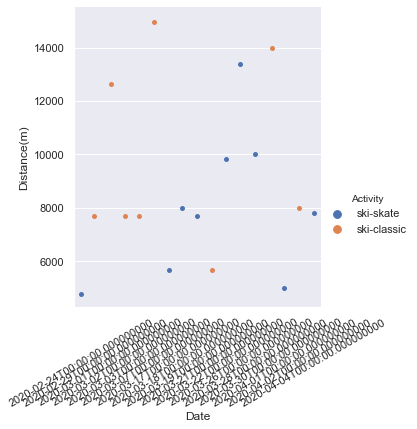

In [32]:
p = sns.catplot(x="Date", y="Distance(m)", hue="Activity", data=data)
p.set_xticklabels(rotation=30)

In [33]:
p = figure(plot_width=500, plot_height=400)#, x_axis_type="datetime")
p.line('Date', 'Weight', source=weight)
show(p)

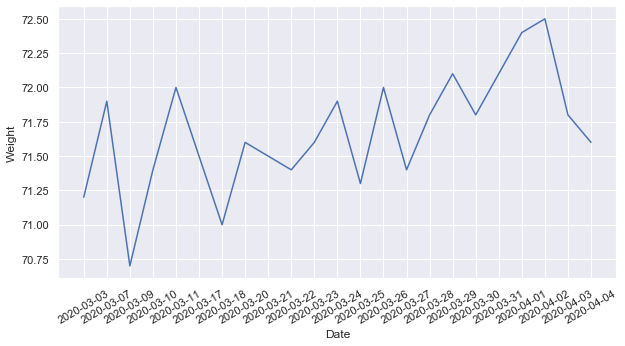

In [34]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x='Date', y='Weight', data=weight)
ax.set_xticklabels(weight["Date"], rotation=30)
plt.show()

In [35]:
elsa_weight.head()

,date,weight
0,20-02-15,15.7
1,20-03-02,16.5
2,20-03-08,16.6
3,20-03-17,16.8
4,20-03-20,16.9


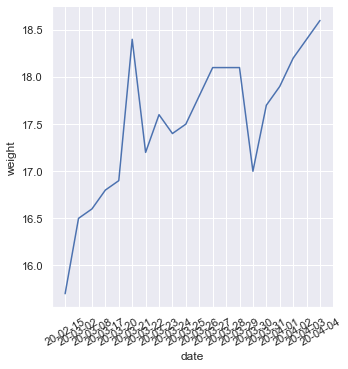

In [36]:
r = sns.relplot(x="date", y="weight", kind="line", data=elsa_weight)
r.set_xticklabels(rotation=30)